In [347]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
# IF YOU'RE USING A PLUGIN FOR DARK-MODE, UNCOMMMENT THE FOLLOWING LINES
import matplotlib
matplotlib.rcParams['text.color'] = 'white'
matplotlib.rcParams['axes.labelcolor'] = 'white'
matplotlib.rcParams['xtick.color'] = 'white'
matplotlib.rcParams['ytick.color'] = 'white'

### Time-limited experiment

In [361]:
environment = np.array([
    [0,0,1,1,1,0,0,0,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0]
])

environment

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [396]:
environment[9]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [508]:
start_state = [environment.shape[0]-1, 0]
action_list = ['u', 'd', 'l', 'r']

expert_trajectory = ['r', 'r', 'r', 'r', 'u','u','u','u','u','u','u',
                    'r','r','u','l','l','u','l','l', 'd']

In [509]:
def environment_crawl(start_state, num_actions, environment, trajectory):
    
    step = 0
    current_state = start_state.copy()
    coins = 0
    
    state_traj = []
#     state_traj.append(current_state)
    
    while step < num_actions:
        
        action = trajectory[step]
        
        if action == 'u':
            
            if current_state[0] -1 < 0:
                
                print('here above')
                new_state = current_state
            
            else:
            
                new_state = current_state
                new_state[0] -= 1
        
        if action == 'd':
            
            if current_state[0] + 1 > environment.shape[0]:
                print('here below')
                new_state = current_state
            
            else:
                
                new_state = current_state
                new_state[0] += 1
        
        if action == 'l':
            
            if current_state[1] - 1 < 0:
                print('here left')
                new_state = current_state
            
            else:

                new_state = current_state
                new_state[1] -= 1
        
        if action == 'r':
            
            if current_state[1] + 1 > environment.shape[1]:
                print('here right')
                new_state = current_state
            
            else:
                
                new_state = current_state
                new_state[1] += 1

        
        # Seeing if we picked up a coin
        coins += environment[new_state[0], new_state[1]]
        
        current_state = new_state
        state_traj.append(new_state.copy())
        step += 1
        
    return coins, state_traj

In [510]:
e_coins, e_state_trajectory = environment_crawl(start_state=start_state, 
                  num_actions=20, 
                  environment=environment, 
                  trajectory=expert_trajectory)

In [511]:
e_state_trajectory

[[9, 1],
 [9, 2],
 [9, 3],
 [9, 4],
 [8, 4],
 [7, 4],
 [6, 4],
 [5, 4],
 [4, 4],
 [3, 4],
 [2, 4],
 [2, 5],
 [2, 6],
 [1, 6],
 [1, 5],
 [1, 4],
 [0, 4],
 [0, 3],
 [0, 2],
 [1, 2]]

In [465]:
get_one_hot(coordinates=e_state_trajectory[0], n_states=100)

91


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [400]:
environment

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [483]:
# Features for each state?
def get_one_hot(coordinates,  n_states):
    """
    
    Args:
        coordinates (row, column)
    """
    
    # The coordinates are coming in as 0-index based array coordinates
    # To make them work with the formula, they need to be made into 1-index based
    coords = coordinates.copy()
    coords[0] += 1
    coords[1] += 1
    # First determining what number state the agent is currently in
    state = ((coords[0]-1) * 10) + (coords[1])
    zeros = np.zeros(n_states)
    zeros[state-1] += 1
    
    return zeros

In [430]:
# Calculating the expert's feture vector
def mu_estimaete(trajectories, gamma):
    
    # Init a list that will hold the Feature Expectations of each trajectory
    outer_traj = [] 
    
    # Looping through the list of trajectories...
    # traj is each individual episode
    for traj in trajectories:
        
        # Init an inner list holder for the
        inner_traj = []
    
        for i, step in enumerate(traj):
            
            # We need to ensure that the ϕ vector is in the same order
            # We can do this by looping through each of the
            phi = step
            
            phi = (gamma ** i) * phi
            
            inner_traj.append(phi)
        
        # Once we have finished looping through all of the steps, let us sum the vectors
        # Let us start by init'ing a vector of zeros
        # This is the same length as the feature vector, ϕ
        init_vector = np.zeros(len(inner_traj[0]))
        
        # Then, looping through each discounted state and summing them together
        for state in inner_traj:
            
            init_vector += state
            
        outer_traj.append(init_vector)
        
    # Now summing together each of the feature expectation vectors in outer_traj
    init_vector = np.zeros(len(outer_traj[0]))
    
    for fv in outer_traj:

        init_vector += fv
        
    # AND FINALLY, averaging this to get our final Feature Expectation vector
    init_vector = init_vector / len(outer_traj)
    
    return init_vector

In [492]:
# Converting the state trajectories from the "environment_crawl()" function into a list of
# state vectors
    
e_phis = [get_one_hot(coordinates=x, n_states=100) for x in e_state_trajectory]

In [494]:
# Calculating the expert's feture vector
def mu_estimaete(trajectories, gamma):
    
    # Init a list that will hold the Feature Expectations of each trajectory
    outer_traj = [] 
    
    # Looping through the list of trajectories...
    # traj is each individual episode
    for traj in trajectories:
        
        # Init an inner list holder for the
        inner_traj = []
    
        for i, step in enumerate(traj):
            
            # We need to ensure that the ϕ vector is in the same order
            # We can do this by looping through each of the
            phi = step
            
            phi = (gamma ** i) * phi
            
            inner_traj.append(phi)
        
        # Once we have finished looping through all of the steps, let us sum the vectors
        # Let us start by init'ing a vector of zeros
        # This is the same length as the feature vector, ϕ
        init_vector = np.zeros(len(inner_traj[0]))
        
        # Then, looping through each discounted state and summing them together
        for state in inner_traj:
            
            init_vector += state
            
        outer_traj.append(init_vector)
        
    # Now summing together each of the feature expectation vectors in outer_traj
    init_vector = np.zeros(len(outer_traj[0]))
    
    for fv in outer_traj:

        init_vector += fv
        
    # AND FINALLY, averaging this to get our final Feature Expectation vector
    init_vector = init_vector / len(outer_traj)
    
    return init_vector
            

In [496]:
e_mu = mu_estimaete(trajectories=[e_phis], gamma=0.99)

In [499]:
# Generating a random trajectory
rand_action_trajectory = [np.random.choice(action_list) for x in range(20)]

In [514]:
_, rand_state_trajectory = environment_crawl(start_state=start_state, 
                                          num_actions=20, 
                                          environment=environment, 
                                          trajectory=rand_action_trajectory)

here left
here left
here left


In [518]:
rand_phis = [get_one_hot(coordinates=x, n_states=100) for x in rand_state_trajectory]

In [520]:
rand_mu = mu_estimaete(trajectories=[rand_phis], gamma=0.99)

In [524]:
w = e_mu - rand_mu
w = w / np.sum(np.abs(w))

In [529]:
mu_bar = rand_mu

In [532]:
t = np.linalg.norm((e_mu - mu_bar ), 2)
t

10.774665259363385

In [534]:
def projection(mu_m1, mu_bar_m2, mu_e):
    
    numerator = (mu_m1 - mu_bar_m2).T * (mu_e - mu_bar_m2)
    denominator = (mu_m1 - mu_bar_m2).T * (mu_m1 - mu_bar_m2)
    
    result1 = numerator / denominator
    
    result2 = result1 * (mu_m1 - mu_bar_m2)
    
    return mu_bar_m2 + result2

In [ ]:
# Main loop
break_cond = 10e-3

# Before we go
# On the first go-around, we set  some stuff...
w = e_mu - rand_mu
w = w / np.sum(np.abs(w))
mu_bar = rand_mu
t = np.linalg.norm((e_mu - mu_bar ), 2)

# Going throught the loop, we need some dynamically typed variables
mu_bar_m1 = mu_bar

while t > break_cond:
    
    # As we have done steps 1 and 2 pre-loop, we have to begin here with the RL algo
    # (DEVELOPMENT FOR THIS IS BELOW)
    
    # Compute projection
    mu_bar_m1 = projection(mu_m1)

In [577]:
state_index_mapping = {}

for i, state in enumerate(e_phis):
    
    state_index_mapping[i]  = state

In [578]:
state_index_mapping

{0: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 1: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 2: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.,

In [556]:
def arreq_in_list(myarr, list_arrays):
    return next((True for elem in list_arrays if np.array_equal(elem, myarr)), False)

In [574]:
def state_to_index(state_index_mapping, state_phi):
    """HANDLES CASE WHERE STATE_PHI NOT IN HERE"""
    # Check
    if arreq_in_list(myarr=state_phi, list_arrays=[v for k,v in state_index_mapping.items()]):
        
        for k,v in state_index_mapping.items():
            
            if np.array_equal(v, state_phi):
                
                return state_index_mapping, k
            
            else:
                
                continue
    
    else:
        
        increment = np.max([k for k,v in state_index_mapping.items()])
        state_index_mapping[increment+1] = state_phi
        
        return state_index_mapping, increment+1
        
        

In [589]:
def reset_q(state_index_mapping, action_list):
    """"""
    
    q = pd.DataFrame(0,
                     columns=action_list,
                     index=[x for x in range(len(state_index_mapping))])
    
    return q

In [590]:
def read_q(q, state, action_list):
    """state is in the index from state_to_index()"""
    
    if state not in q.index:
        
        new_state = pd.DataFrame(0,
                                 columns=action_list,
                                 index=[state])

        q = q.append(new_state)
        
        return q, q.loc[state]
    
    else:
        
        return q, q.loc[state]

In [714]:
q = reset_q(state_index_mapping=state_index_mapping, 
            action_list=action_list)
q

,u,d,l,r
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [592]:
read_q(q=q, state=20, action_list=action_list)

(    u  d  l  r
 0   0  0  0  0
 1   0  0  0  0
 2   0  0  0  0
 3   0  0  0  0
 4   0  0  0  0
 5   0  0  0  0
 6   0  0  0  0
 7   0  0  0  0
 8   0  0  0  0
 9   0  0  0  0
 10  0  0  0  0
 11  0  0  0  0
 12  0  0  0  0
 13  0  0  0  0
 14  0  0  0  0
 15  0  0  0  0
 16  0  0  0  0
 17  0  0  0  0
 18  0  0  0  0
 19  0  0  0  0
 20  0  0  0  0, u    0
 d    0
 l    0
 r    0
 Name: 20, dtype: int64)

In [635]:
def write_q(q, state_index, action, QSA):
    
    q.loc[state_index, action] = QSA
    
    return q

In [656]:
def environment_move(current_state, environment, A):
    
    if A == 'l':
            
        if current_state[1] - 1 < 0:

            return current_state

        else:

            new_state = current_state
            new_state[1] -= 1 
            return new_state

    if A == 'r':

        if current_state[1] + 1 > environment.shape[1]-1:

            return current_state

        else:

            new_state = current_state
            new_state[1] += 1
            return new_state

    if A == 'u':

        if current_state[0] -1 < 0:

            return current_state

        else:

            new_state = current_state
            new_state[0] -= 1
            return new_state

    if A == 'd':

        if current_state[0] + 1 > environment.shape[0]-1:
            return current_state

        else:

            new_state = current_state
            new_state[0] += 1
            return new_state

In [715]:
def q_learning(q, 
               break_cond, 
               w, 
               state_index_mapping, 
               start_state, 
               n_states, 
               action_list,
               alpha,
               gamma,
               num_steps,
               epsilon=.9):
    
    
    delta = 100
    cumsum_r_ts = [] 
    delta_incrementor = 0
    
    while delta > break_cond:
        
        cumsum_r = 0
        step = 0
        current_state = start_state.copy()
        
        while step < num_steps:
            
            # Getting the phi vector for the current state
            phi = get_one_hot(coordinates=current_state, n_states=100)

            # Getting the state index for the phi
            state_index_mapping, index = state_to_index(state_index_mapping=state_index_mapping, 
                                                        state_phi=phi)

            # E-greedy action selection
            # Greedy action
            if np.random.random() < epsilon:

                # Updating q if necessary and outputting the state-table we care about
                q, state_table = read_q(q=q, state=index, action_list=action_list)

                # Getting the max Q(S,A)
                q_sa = np.max(state_table)

                # Checking to see  if there if more than one maximum
                # If there is more than one column tied for np.max()...
                if len(state_table[state_table == q_sa]) > 1:

                    # Pulling out the action names from the index
                    A = np.random.choice(state_table[state_table == q_sa].index.tolist())

                # Else, simply pull out the action
                else:

                    A = state_table[state_table == q_sa].index[0]

            # Random action choice
            else:

                # Updating q if necessary and outputting the state-table we care about
                q, state_table = read_q(q=q, state=index, action_list=action_list)

                A = np.random.choice(action_list)

                q_sa = state_table[A]

            # Now discerning what S' would be by using the given action
            new_state = environment_move(current_state=current_state, 
                                         environment=environment, 
                                         A=A)

            # Great, now we have our new state
            # Let's read q for this as well
            # Getting the phi vector for the current state
            phi_prime = get_one_hot(coordinates=new_state, n_states=100)

            # Getting the state index for the phi
            state_index_mapping, index_p = state_to_index(state_index_mapping=state_index_mapping, 
                                                        state_phi=phi_prime)


            # Updating q if necessary and outputting the state-table we care about
            q, state_table = read_q(q=q, state=index_p, action_list=action_list)

            # Getting the max Q(S,A)
            q_saprime = np.max(state_table)

            # Now let's generate the new Q(S,A)
            QSA = q_sa + alpha * (np.inner(w, phi) + gamma * q_saprime - q_sa)

            # Updating the value in q
            q = write_q(q=q, state_index=index, action=A, QSA=QSA)

            # Moving
            current_state = new_state
            
            # Summing reward
            cumsum_r += np.inner(w, phi)
            
            step += 1
            
        cumsum_r_ts.append(cumsum_r)
        
        delta_incrementor += 1
        
        if delta_incrementor % 100 == 0:
            delta = np.average(cumsum_r_ts[len(cumsum_r_ts)-10:len(cumsum_r_ts)]) - cumsum_r_ts[len(cumsum_r_ts)-1]
            
    return cumsum_r_ts, q

           u         d         l         r
0   0.001754  0.014931  0.004955  0.246959
1   0.016431  0.055629  0.061153  0.337678
2   0.013403  0.044920  0.336580  0.011005
3   0.000000  0.001473  0.004934  0.019830
4   0.000000  0.000000  0.002110  0.000000
5   0.000000  0.000522  0.001596  0.015158
6   0.000000  0.000000  0.000000  0.000000
7   0.000000  0.000000  0.000000  0.000000
8   0.000000  0.000000  0.000000  0.000000
9   0.000000  0.000000  0.000000  0.000000
10  0.000000  0.000000  0.000000  0.000000
11  0.000000  0.000000  0.000000  0.000000
12  0.000000  0.000000  0.000000  0.000000
13  0.000000  0.000000  0.000000  0.000000
14  0.000000  0.000000  0.000000  0.000000
15  0.000000  0.000000  0.000000  0.000000
16  0.000000  0.000000  0.000000  0.000000
17  0.000000  0.000000  0.000000  0.000000
18  0.000000  0.000000  0.000000  0.000000
19  0.000000  0.000000  0.000000  0.000000
20 -0.000015  0.000512  0.001039  0.124821
21 -0.003055 -0.000098 -0.001543 -0.001543
22  0.00007

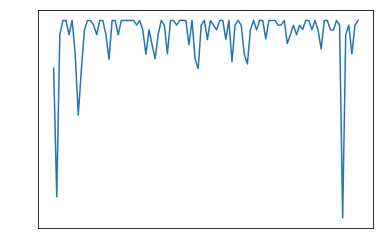

In [716]:
cumsum_r, q = q_learning(q=q, 
                   break_cond=10e-5, 
                   w=w, 
                   state_index_mapping=state_index_mapping, 
                   start_state=start_state, 
                   n_states=n_states, 
                   action_list=action_list,
                   num_steps=len(expert_trajectory),
                   alpha=0.02,
                   gamma=0.99,
                   epsilon=.9)

plt.plot(cumsum_r)
print(q)

In [713]:
# Pulling out the best greedy path
def greedy_path(q, n_steps, start_state, state_index_mapping, action_list):
    
    step = 0
    
    current_state = start_state.copy()
    
    action_trajectory = []
    while step < n_steps:
        
        state_phi = get_one_hot(coordinates=current_state, n_states=100)
        
        state_to_index, index = state_to_index(state_index_mapping=state_index_mapping, 
                                               state_phi=state_phi)
        
        q, state_table = read_q(q=q, state=index, action_list=action_list)
        
        q_sa = np.max(state_table)
        step += 1
    

NameError: name 'r_max' is not defined

0.08165271766891247


0.32895267512997295

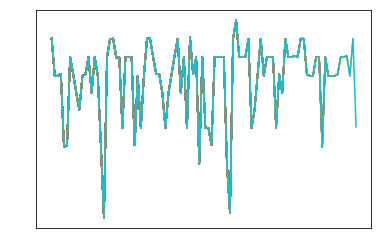

In [706]:
q_learning(q=q, 
           break_cond=99, 
           w=w, 
           state_index_mapping=state_index_mapping, 
           start_state=start_state, 
           n_states=n_states, 
           action_list=action_list,
           num_steps=len(expert_trajectory),
           alpha=0.02,
           gamma=0.99,
           epsilon=.9)